<a href="https://colab.research.google.com/github/dhyannn/Deep-learning/blob/main/514_DLprog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python implementation of the perceptron learning algorithm to train neural networks
for the following boolean functions: a) AND, b) OR, c) NAND, d) XOR. Begin by manually
assigning weights and displaying the number of errors between positive and negative outcomes.
Then, utilize the perceptron learning algorithm to adjust the weights and eliminate these errors
by finding the optimal weight configuration.

Boolean function: AND


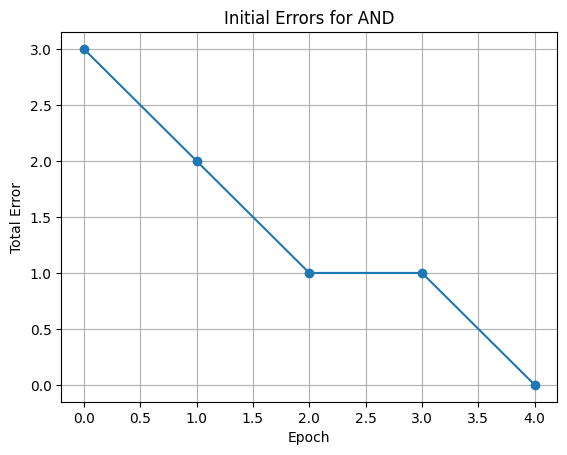

Initial weights:
Epoch 1: Error=3, Weights=[0.12154167 0.05048862 0.7034476 ]
Epoch 2: Error=2, Weights=[-0.07845833  0.05048862  0.6034476 ]
Epoch 3: Error=1, Weights=[-0.17845833  0.05048862  0.5034476 ]
Epoch 4: Error=1, Weights=[-0.27845833  0.05048862  0.4034476 ]
Epoch 5: Error=0, Weights=[-0.27845833  0.15048862  0.4034476 ]


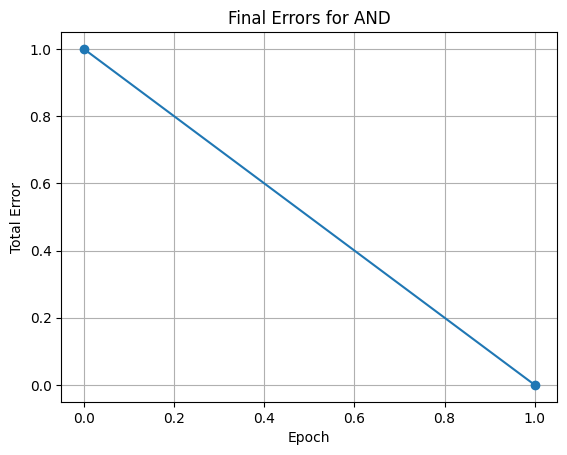

Final weights:
Epoch 6: Error=1, Weights=[-0.37845833  0.15048862  0.3034476 ]
Epoch 7: Error=0, Weights=[-0.37845833  0.15048862  0.3034476 ]

Boolean function: OR


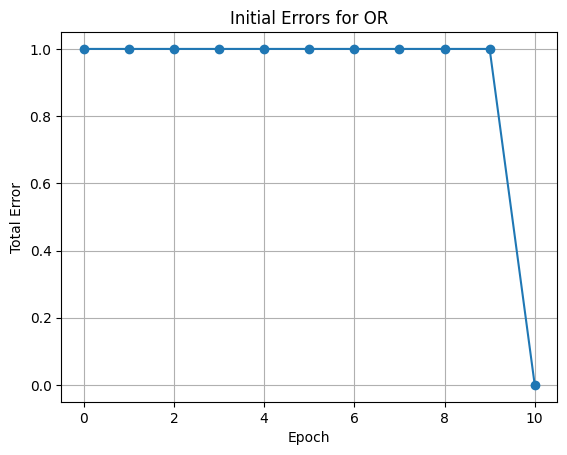

Initial weights:
Epoch 1: Error=1, Weights=[0.88046759 0.92128137 0.52777707]
Epoch 2: Error=1, Weights=[0.78046759 0.92128137 0.52777707]
Epoch 3: Error=1, Weights=[0.68046759 0.92128137 0.52777707]
Epoch 4: Error=1, Weights=[0.58046759 0.92128137 0.52777707]
Epoch 5: Error=1, Weights=[0.48046759 0.92128137 0.52777707]
Epoch 6: Error=1, Weights=[0.38046759 0.92128137 0.52777707]
Epoch 7: Error=1, Weights=[0.28046759 0.92128137 0.52777707]
Epoch 8: Error=1, Weights=[0.18046759 0.92128137 0.52777707]
Epoch 9: Error=1, Weights=[0.08046759 0.92128137 0.52777707]
Epoch 10: Error=1, Weights=[-0.01953241  0.92128137  0.52777707]
Epoch 11: Error=0, Weights=[-0.01953241  0.92128137  0.52777707]


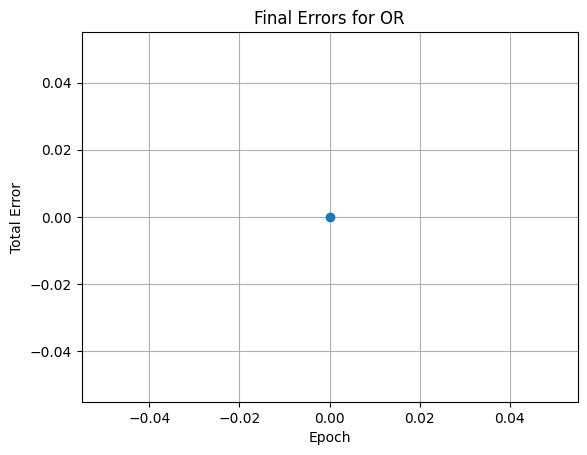

Final weights:
Epoch 12: Error=0, Weights=[-0.01953241  0.92128137  0.52777707]

Boolean function: NAND


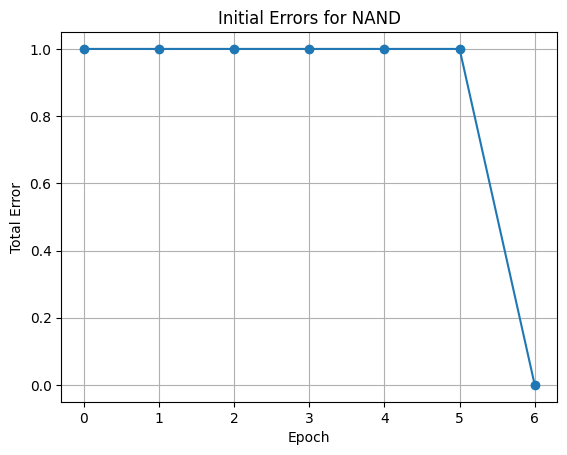

Initial weights:
Epoch 1: Error=1, Weights=[0.56139079 0.26380852 0.49687878]
Epoch 2: Error=1, Weights=[0.46139079 0.16380852 0.39687878]
Epoch 3: Error=1, Weights=[0.36139079 0.06380852 0.29687878]
Epoch 4: Error=1, Weights=[ 0.26139079 -0.03619148  0.19687878]
Epoch 5: Error=1, Weights=[ 0.16139079 -0.13619148  0.09687878]
Epoch 6: Error=1, Weights=[ 0.06139079 -0.23619148 -0.00312122]
Epoch 7: Error=0, Weights=[ 0.06139079 -0.23619148 -0.10312122]


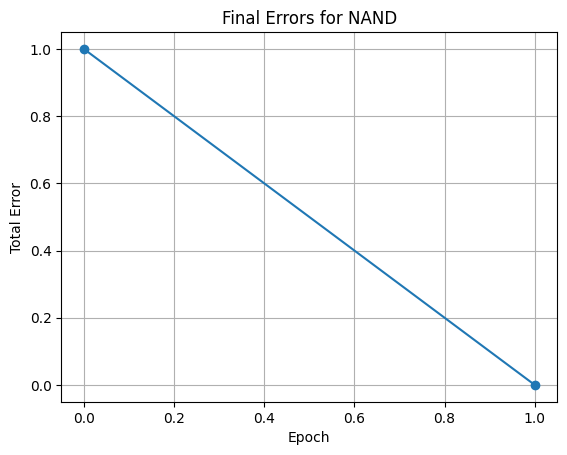

Final weights:
Epoch 8: Error=1, Weights=[ 0.16139079 -0.23619148 -0.10312122]
Epoch 9: Error=0, Weights=[ 0.16139079 -0.23619148 -0.20312122]

Boolean function: XOR


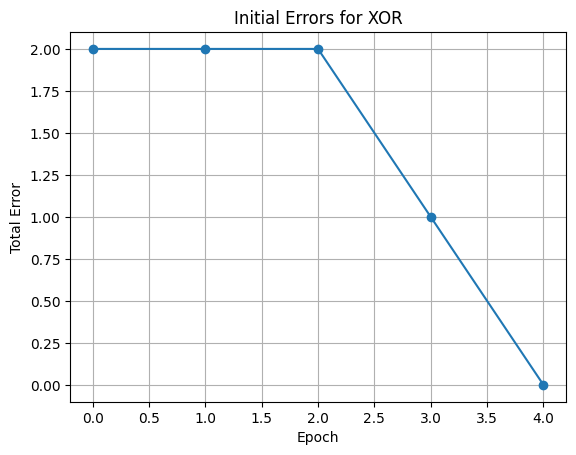

Initial weights:
Epoch 1: Error=2, Weights=[0.37215758 0.78780722 0.25029994]
Epoch 2: Error=2, Weights=[0.17215758 0.68780722 0.15029994]
Epoch 3: Error=2, Weights=[-0.02784242  0.58780722  0.05029994]
Epoch 4: Error=1, Weights=[-0.12784242  0.48780722 -0.04970006]
Epoch 5: Error=0, Weights=[-0.12784242  0.38780722 -0.04970006]


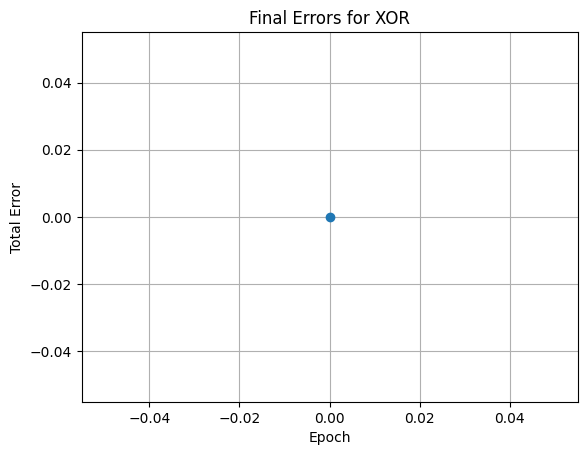

Final weights:
Epoch 6: Error=0, Weights=[-0.12784242  0.28780722 -0.04970006]



In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # x*w + b
        return self.activation(summation)

    def train(self, training_inputs, labels):
        errors = []
        weights_history = []
        for _ in range(self.epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                total_error += error
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            errors.append(abs(total_error))
            weights_history.append(np.copy(self.weights))
            if total_error == 0:
                break
        return errors, weights_history

def visualize(errors, title):
    plt.plot(range(len(errors)), errors, marker='o')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.show()

def main():
    boolean_functions = {
        "AND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
        "OR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
        "NAND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([1, 1, 1, 0])),
        "XOR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]))
    }

    for function, (inputs, labels) in boolean_functions.items():
        print(f"Boolean function: {function}")
        perceptron = Perceptron(input_size=2)
        initial_errors, initial_weights = perceptron.train(inputs, labels)
        visualize(initial_errors, f"Initial Errors for {function}")

        print("Initial weights:")
        for i, weights in enumerate(initial_weights):
            print(f"Epoch {i+1}: Error={initial_errors[i]}, Weights={weights}")

        final_errors, final_weights = perceptron.train(inputs, labels)
        visualize(final_errors, f"Final Errors for {function}")

        print("Final weights:")
        for i, weights in enumerate(final_weights):
            print(f"Epoch {len(initial_weights) + i + 1}: Error={final_errors[i]}, Weights={weights}")
        print()

if __name__ == "__main__":
    main()


Python script to utilize the gradient descent algorithm for locating the global minima
of the following equations. Additionally, ensure the program prints the number of iterations
taken to identify the global minima.
i) f(x) = x^2 - 2x + 2
ii) f(x, y) = (1 - x)^2 + 100(y - x^2)^2

Global minimum for f(x): 1.00
Iterations taken: 50


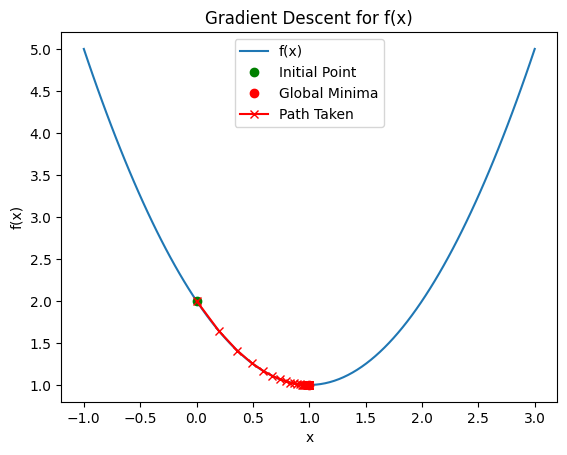

Global minimum for f(x, y): (0.67, 0.45)
Iterations taken: 1000


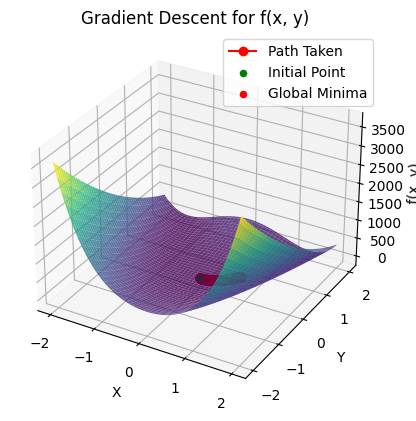

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f1(x):
    return x**2 - 2*x + 2

# Define the derivative of f(x)
def df1(x):
    return 2*x - 2

# Define the function f(x, y)
def f2(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define the partial derivatives of f(x, y)
def df2_dx(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def df2_dy(x, y):
    return 200 * (y - x**2)

# Gradient Descent function for f(x)
def gradient_descent_f1(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]

    for i in range(num_iterations):
        gradient = df1(x)
        x = x - learning_rate * gradient
        x_history.append(x)

    return x, x_history, num_iterations

# Gradient Descent function for f(x, y)
def gradient_descent_f2(initial_x, initial_y, learning_rate, num_iterations):
    x = initial_x
    y = initial_y
    x_history = [x]
    y_history = [y]

    for i in range(num_iterations):
        gradient_x = df2_dx(x, y)
        gradient_y = df2_dy(x, y)
        x = x - learning_rate * gradient_x
        y = y - learning_rate * gradient_y
        x_history.append(x)
        y_history.append(y)

    return (x, y), x_history, y_history, num_iterations

# Example for f(x)
initial_x = 0
learning_rate = 0.1
num_iterations = 50

x, x_history, iterations = gradient_descent_f1(initial_x, learning_rate, num_iterations)

print("Global minimum for f(x): {:.2f}".format(x))
print("Iterations taken:", iterations)

# Plotting for f(x)
x_vals = np.linspace(-1, 3, 100)
plt.plot(x_vals, f1(x_vals), label='f(x)')
plt.plot(initial_x, f1(initial_x), 'go', label='Initial Point')
plt.plot(x, f1(x), 'ro', label='Global Minima')
plt.plot(x_history, f1(np.array(x_history)), 'rx-', label='Path Taken')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for f(x)')
plt.legend()
plt.show()

# Example for f(x, y)
initial_x = 0
initial_y = 0
learning_rate = 0.001
num_iterations = 1000

(x, y), x_history, y_history, iterations = gradient_descent_f2(initial_x, initial_y, learning_rate, num_iterations)

print("Global minimum for f(x, y): ({:.2f}, {:.2f})".format(x, y))
print("Iterations taken:", iterations)

# Plotting for f(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f2(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot(x_history, y_history, f2(np.array(x_history), np.array(y_history)), 'ro-', label='Path Taken')
ax.scatter(initial_x, initial_y, f2(initial_x, initial_y), color='green', label='Initial Point')
ax.scatter(x, y, f2(x, y), color='red', label='Global Minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent for f(x, y)')
ax.legend()
plt.show()
